<a href="https://colab.research.google.com/github/Nubiancodingdelight/ACS-Project-Repository-/blob/main/Generating_VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounts google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
#set path
%cd /content/drive/MyDrive/ACS_Research/VISDB_Data/

/content/drive/MyDrive/ACS_Research/VISDB_Data


In [4]:
#install Biopython and pyfaidx
!pip install Bio pyfaidx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.7 MB/s eta 0:00:00


In [5]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyfaidx import Fasta

# FUNCTIONS

## Extract sequence from virus

In [6]:
#name: Name of Virus
#ref: Specific  Viral Sequence
def virus_seq_extract(name, ref, start, stop):
  #location of fasta sequence
  path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/' +name+ "/"+ "sequence.fasta"
  virus_gene = Fasta(path)
  if ref in virus_gene.keys():
    extracted_seq = virus_gene[ref][start-1:stop]
  elif ref in ('NC_003977.1', 'NC_003977'):
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/HBV/NC_003977.1.fasta'
    virus_gene = Fasta(path)
    extracted_seq = virus_gene['NC_003977.1'][start-1:stop]
  else:
    print(f"Reference {ref} not found in {name}")
  return extracted_seq.seq

In [ ]:
#testing virus
#print(virus_seq_extract('HBV', 'NC_003977.1',50, 100))

TATTTTCCTGCTGGTGGCTCCAGTTCCGGAACAGTAAACCCTGTTCCGACT


## Extract Sequence from Human Reference 100 bp upstream and 100 bp downstream

In [7]:
def human_seq_extract(ref, chr, start, stop):
  seq_list = []
  #hg19 human reference genome
  if ref.lower() in ('grch37/hg19','hg19','grch37'):
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/hg19/uncompressed/' + chr + '.fa'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-100:start].seq)
      seq_list.append(genes[0][stop:stop+100].seq)
    else:
      seq_list.append(genes[0][start:start+100].seq)
      seq_list.append(genes[0][stop-100:stop].seq)

  #hg38 human reference
  elif ref.lower() in ('hg38'):
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/hg38/uncompressed/' + chr + '.fa'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-100:start])
      seq_list.append(genes[0][stop:stop+100])
    else:
      seq_list.append(genes[0][start:start+100])
      seq_list.append(genes[0][stop-100:stop])

  #All other references
  else:
    #hg38
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/'+ref + '/' + chr + '.fasta'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-100:start])
      seq_list.append(genes[0][stop:stop+100])
    else:
      seq_list.append(genes[0][start:start+100])
      seq_list.append(genes[0][stop-100:stop])
  return seq_list

In [ ]:
#testing
#print(human_seq_extract('hg19', 'chr1', 100, 200))

['NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN', 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN']


In [8]:
#testing
#print(human_seq_extract('AL360074', 'chr1', 100, 200))

[>AL360074.21:1-100
AAGCATTTTAGGGCGCTACCCTGTTTCTGTAGGGCATATTGACATCCTGAATGCAAGGAAGTCTGGTTAATGCTATTCTCTCAAATACAGGGTTTTGGTG, >AL360074.21:201-300
ATTTACCAGCTTCTGTTGTGGGCCTGTGAATATATTAGGGTGTGATGACAGATGAGGTCTTGTCTTTTGGAAACTTAACAGGATTGTTGGGGGCGGGGAA]


##Lowercases all column names and replaces spaces with underscores

In [9]:
def lower_case_and_underscore(df):
  """Lowercases all column names and replaces spaces with underscores."""
  new_columns = [col.lower().replace(' ', '_') for col in df.columns]
  df.columns = new_columns
  return df

# **HBV**

Load Data

In [ ]:
#load xslx
hbv_df = pd.read_excel('HBV_VIS.xlsx')
hbv_df.head()

,Virus,Virus subtype,Reference virus genome,Begin breakpoint,Stop breakpoint,Chromosome,Locus,Reference human genome,Begin location,End location,Sample,Disease,Method,PubMed ID,Target gene
0,HBV,NaN,FJ562281.1,1782.0,NaN,chr9,q31.1,GRCh38,100940295.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,CORO2A
1,HBV,NaN,GQ377546.1,1820.0,NaN,chr9,q31.1,GRCh38,101030026.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
2,HBV,NaN,KC792890.1,1471.0,NaN,chr3,p26.3,GRCh38,2002381.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
3,HBV,NaN,FJ622847.1,689.0,NaN,chr2,q35,GRCh38,216281034.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
4,HBV,NaN,KF166416.1,1807.0,NaN,chr16,q12.1,GRCh38,51320015.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN


Transform Data

In [ ]:
vis = hbv_df['reference_virus_genome'].unique()
for item in vis:
  print(f"{item} or ")
print(len(vis))

FJ562281.1 or 
GQ377546.1 or 
KC792890.1 or 
FJ622847.1 or 
KF166416.1 or 
KF167170.1 or 
GU815714.1 or 
GU815645.1 or 
JN827419.1 or 
JQ688405 or 
JX026886.1 or 
AB713529.1 or 
KC792925.1  or 
JX507212.1 or 
nan or 
U95551.1 or 
X70185.1 or 
AB033556.1 or 
X75657.1 or 
AP011098 or 
 V01460.1 or 
JQ688404 or 
NC_003977 or 
AP011098.1 or 
AF533983.1 or 
AB033550.1 or 
D00329.1 or 
D00330.1 or 
AF043594.1 or 
D00630.1 or 
NC_003977.1 or 
AY800389.1
 or 
AY033073.1 or 
V01460.1 or 
AB241115 or 
X0276 or 
DQ089769.1 or 
V00866 or 
AF068756  or 
AF330110 or 
D50519.1 or 
41


In [ ]:
#filter out rows where begin_breakpoint or stop breakpoint  and also begin and end location are NA

hbv_df = hbv_df.dropna(subset=['begin_breakpoint', 'stop_breakpoint', 'begin_location', 'end_location', 'reference_virus_genome'], how='any')
hbv_df.head()

,virus,virus_subtype,reference_virus_genome,begin_breakpoint,stop_breakpoint,chromosome,locus,reference_human_genome,begin_location,end_location,sample,disease,method,pubmed_id,target_gene
346,HBV,NaN,X70185.1,1720.0,1603.0,chr1,q21.1,GRCh37/hg19,420.0,437.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,ANP32E
347,HBV,NaN,X70185.1,1246.0,1390.0,chr1,p21.3,GRCh37/hg19,97732036.0,97732056.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,DPYD
348,HBV,NaN,X70185.1,1603.0,1664.0,chr1,q31.3,GRCh37/hg19,194161891.0,194161910.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,NaN
349,HBV,NaN,X70185.1,1623.0,1717.0,chr2,q31.1,GRCh37/hg19,171450967.0,171450816.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,MYO3B
350,HBV,NaN,X70185.1,1638.0,1717.0,chr2,q31.1,GRCh37/hg19,171450967.0,171450816.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,MYO3B


In [ ]:
# Filter for 'GRCh37/hg19', 'hg19', or 'GRCh37' in the 'reference_human_genome' column (case-insensitive)
hbv_df = hbv_df[hbv_df['reference_human_genome'].str.lower().isin(['grch37/hg19', 'hg19', 'grch37'])]
hbv_df['reference_human_genome'].unique()


array(['GRCh37/hg19', 'GRCh37'], dtype=object)

In [ ]:
#make all values lowercase
hbv_df = lower_case_and_underscore(hbv_df)

Data Visualization to Characterize Data

In [ ]:
import natsort
chromosome_counts = hbv_df.sort_values(by='chromosome')['chromosome'].value_counts()
chromosome_counts = chromosome_counts.reindex(natsort.natsorted(chromosome_counts.index))

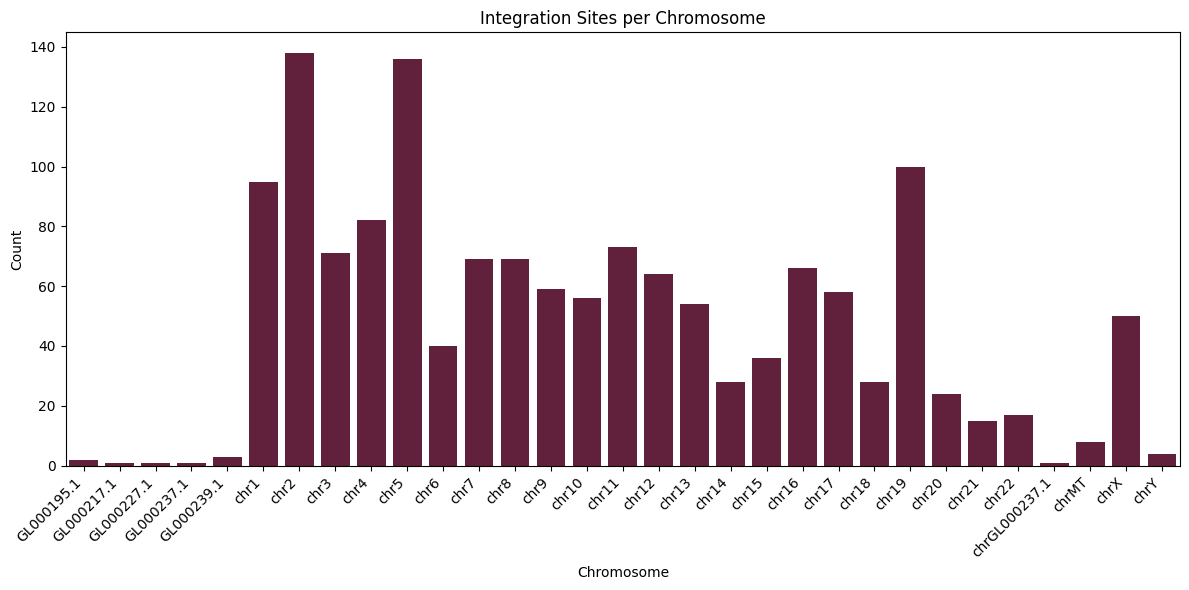

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=chromosome_counts.index, y=chromosome_counts.values, color='#6b173b')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('HBV Integration Sites per Chromosome')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Concatenate Viral and Human Sequence and Insert into

In [ ]:
#loop through data
seq_list =[]
for ind, row in hbv_df.iterrows():
    try:
      virus_name = row['virus']
      virus_ref = row['reference_virus_genome']
      hum_ref = row['reference_human_genome']
      chrom = row['chromosome']
      begin_ref = int(row['begin_location'])
      stop_ref = int(row['end_location'])
      human_seq = human_seq_extract(hum_ref, chrom, begin_ref, stop_ref )
      viral_seq = virus_seq_extract(virus_name, virus_ref, int(row['begin_breakpoint']), int(row['stop_breakpoint']))
      spliced_seq = human_seq[0] + viral_seq + human_seq[1]
      seq_list.append([virus_name, virus_ref, hum_ref, spliced_seq, viral_seq, human_seq[0], human_seq[1]])
      #print(ind)
    except:
      print(f"Virus Name:{virus_name}  Virus Reference: {virus_ref} \n Human Reference: {hum_ref} , Chromosome: {chrom} , Begin Location:{begin_ref} , End Location:{stop_ref} ")
      pass




Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:8932 , End Location:9044 
Reference X0276 not found in HBV
Virus Name:HBV  Virus Reference: X0276 
 Human Reference: GRCh37/hg19 , Chromosome: chr4 , Begin Location:122742792 , End Location:122742755 
Reference X0276 not found in HBV
Virus Name:HBV  Virus Reference: X0276 
 Human Reference: GRCh37/hg19 , Chromosome: chr19 , Begin Location:30291247 , End Location:30291287 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:6598 , End Location:7646 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:11243 , End Location:12291 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000195.1 , Begin Location:48483 , End Location:49531 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000195.1 , Begin Location:49475 , End Location:50523 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000227.1 , Begin Location:73446 , End Location:74494 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:11350 , End Location:12398 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:8431 , End Location:9479 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:13743 , End Location:14791 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000237.1 , Begin Location:32834 , End Location:33882 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000239.1 , Begin Location:14424 , End Location:15472 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
 

Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrGL000237.1 , Begin Location:33183 , End Location:34231 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000239.1 , Begin Location:14877 , End Location:15925 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000239.1 , Begin Location:14320 , End Location:15368 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:8130 , End Location:9178 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:11397 , End Location:12445 


Exception ignored in: <function Faidx.__del__ at 0x7f4243bf16c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000217.1 , Begin Location:116229 , End Location:117277 


In [ ]:
#make seq_list a dataframe save as a csv
seq_df = pd.DataFrame(seq_list, columns=['virus', 'virus_ref', 'human_ref', 'spliced_seq', 'viral_seq', 'human_seq_upstream', 'human_seq_downstream'])
seq_df.to_csv('Spliced_Data_HBV.csv')


# HPV

In [ ]:
#load xslx
hpv_df = pd.read_excel('HPV_VIS.xlsx')
hpv_df.head()

Data Cleaning

In [ ]:
#filter out rows where begin_breakpoint or stop breakpoint  and also begin and end location are NA
hpv_df = hpv_df.dropna(subset=['begin_breakpoint', 'stop_breakpoint', 'begin_location', 'end_location', 'reference_virus_genome'], how='any')
hpv_df.head()

In [ ]:
# Filter for 'GRCh37/hg19', 'hg19', or 'GRCh37' in the 'reference_human_genome' column (case-insensitive)
hpv_df = hpv_df[hpv_df['reference_human_genome'].str.lower().isin(['grch37/hg19', 'hg19', 'grch37'])]
hpv_df['reference_human_genome'].unique()


In [ ]:
hpv_df = lower_case_and_underscore(hpv_df)


In [10]:
hpv_chromosome_counts = hpv_df.sort_values(by='chromosome')['chromosome'].value_counts()
hpv_chromosome_counts = chromosome_counts.reindex(natsort.natsorted(chromosome_counts.index))

NameError: name 'hpv_df' is not defined

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hpv_chromosome_counts.index, y=hpv_chromosome_counts.values, color='#6b173b')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('HBV Integration Sites per Chromosome')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
vis = hpv_df['reference_virus_genome'].unique()
for item in vis:
  print(f"{item} or ")
print(len(vis))


In [ ]:

#loop through data
seq_list =[]
for ind, row in hpv_df.iterrows():
    try:
      virus_name = row['virus']
      virus_ref = row['reference_virus_genome']
      hum_ref = row['reference_human_genome']
      chrom = row['chromosome']
      begin_ref = int(row['begin_location'])
      stop_ref = int(row['end_location'])
      human_seq = human_seq_extract(hum_ref, chrom, begin_ref, stop_ref )
      viral_seq = virus_seq_extract(virus_name, virus_ref, int(row['begin_breakpoint']), int(row['stop_breakpoint']))
      spliced_seq = human_seq[0] + viral_seq + human_seq[1]
      seq_list.append([virus_name, virus_ref, hum_ref, spliced_seq, viral_seq, human_seq[0], human_seq[1]])
      #print(ind)
    except:
      print(f"Virus Name:{virus_name}  Virus Reference: {virus_ref} \n Human Reference: {hum_ref} , Chromosome: {chrom} , Begin Location:{begin_ref} , End Location:{stop_ref} ")
      pass



In [11]:
#make seq_list a dataframe save as a csv
seq_df = pd.DataFrame(seq_list, columns=['virus', 'virus_ref', 'human_ref', 'spliced_seq', 'viral_seq', 'human_seq_upstream', 'human_seq_downstream'])
seq_df.to_csv('Spliced_Data_HPV.csv')

NameError: name 'seq_list' is not defined

# EBV

In [ ]:
#load xslx into dataframe
ebv_df = pd.read_excel('EBV_VIS.xlsx')
ebv_df.head()

In [ ]:
#filter out rows where begin_breakpoint or stop breakpoint  and also begin and end location are NA
ebv_df = ebv_df.dropna(subset=['begin_breakpoint', 'stop_breakpoint', 'begin_location', 'end_location', 'reference_virus_genome'], how='any')
ebv_df.head()

# Filter for 'GRCh37/hg19', 'hg19', or 'GRCh37' in the 'reference_human_genome' column (case-insensitive)
ebv_df = ebv_df[ebv_df['reference_human_genome'].str.lower().isin(['grch37/hg19', 'hg19', 'grch37'])]


In [ ]:
#lowercase all values
ebv_df = lower_case_and_underscore(ebv_df)

In [ ]:
import natsort
ebv_chromosome_counts = ebv_df.sort_values(by='chromosome')['chromosome'].value_counts()
ebv_chromosome_counts = ebv_chromosome_counts.reindex(natsort.natsorted(chromosome_counts.index))


In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ebv_chromosome_counts.index, y=ebv_chromosome_counts.values, color='#6b173b')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('HBV Integration Sites per Chromosome')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [ ]:

#loop through data
seq_list =[]
for ind, row in ebv_df.iterrows():
    try:
      virus_name = row['virus']
      virus_ref = row['reference_virus_genome']
      hum_ref = row['reference_human_genome']
      chrom = row['chromosome']
      begin_ref = int(row['begin_location'])
      stop_ref = int(row['end_location'])
      human_seq = human_seq_extract(hum_ref, chrom, begin_ref, stop_ref )
      viral_seq = virus_seq_extract(virus_name, virus_ref, int(row['begin_breakpoint']), int(row['stop_breakpoint']))
      spliced_seq = human_seq[0] + viral_seq + human_seq[1]
      seq_list.append([virus_name, virus_ref, hum_ref, spliced_seq, viral_seq, human_seq[0], human_seq[1]])
      #print(ind)
    except:
      print(f"Virus Name:{virus_name}  Virus Reference: {virus_ref} \n Human Reference: {hum_ref} , Chromosome: {chrom} , Begin Location:{begin_ref} , End Location:{stop_ref} ")
      pass



In [ ]:
#make seq_list a dataframe save as a csv
seq_df = pd.DataFrame(seq_list, columns=['virus', 'virus_ref', 'human_ref', 'spliced_seq', 'viral_seq', 'human_seq_upstream', 'human_seq_downstream'])
seq_df.to_csv('Spliced_Data_EBV.csv')